-1.049999999999999


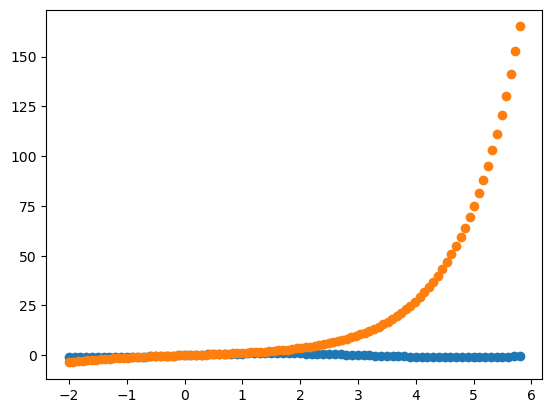

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import random as rn
x = np.arange(-2,5.9,0.1)
y = np.sin(x)
plt.scatter(x,y)

x = np.linspace(-2,5.8,100)
y = np.sinh(x)
plt.scatter(x,y)

a = np.arange(-5,-2.5,0.5)
b = np.arange(-2.05,3,0.05)
c = np.arange(3,5.5,0.5)

x = np.concatenate((a,b,c))
y = np.exp(x**4/(-4))
print(x[25])

In [51]:
a = np.zeros((30,20))
tmp = np.arange(50,70,1)
a[5] = tmp
tmp = np.arange(100,130,1)
a[:,7]= tmp

N = 6
s = np.zeros((N,N))
for i in range(N):
    s[i,i] = s[i,-i-1] = 1
print(s)

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1.]]


In [52]:
import random as rn

R = np.ndarray((10,5))
for i in range(R.shape[0]):
    for j in range(R.shape[1]):
        R[i,j] = int(rn.random()*100)
print(R)


def transpose(r):
    row0 = r.shape[0]
    col0 = r.shape[1]
    c = np.ndarray((col0,row0))
    for i in range(row0):
        for j in range(col0):
            c[j,i] = r[i,j]
    return c
print(transpose(R))

[[46. 80. 99.  8. 21.]
 [73. 44. 93. 16. 60.]
 [ 6. 65. 23. 76. 68.]
 [ 0. 29.  3. 84. 10.]
 [88. 89. 94. 64. 95.]
 [58. 30. 84. 66.  7.]
 [ 4. 90. 18. 98. 13.]
 [45. 30. 79. 28. 68.]
 [ 3. 89. 23.  5. 71.]
 [30.  5. 79. 46. 35.]]
[[46. 73.  6.  0. 88. 58.  4. 45.  3. 30.]
 [80. 44. 65. 29. 89. 30. 90. 30. 89.  5.]
 [99. 93. 23.  3. 94. 84. 18. 79. 23. 79.]
 [ 8. 16. 76. 84. 64. 66. 98. 28.  5. 46.]
 [21. 60. 68. 10. 95.  7. 13. 68. 71. 35.]]


In [53]:
a = np.ndarray( (60,60) )
with open('MatA.txt', 'r') as f:
    mat = [int(i) for i in f]
for i in range(60):
    a[i] = mat[60*i:60*i+60]

print(a[11,11])

b = np.ndarray( (60,60) )
with open('MatB.txt', 'r') as f:
    mat = [int(i) for i in f]
for i in range(60):
    b[i] = mat[60*i:60*i+60]

print(a[34,10], b[34,10])

70.0
13.0 60.0


In [54]:
def MatSum(A,B):
    if A.shape != B.shape:
        return 
    l = A.shape
    C = np.ndarray(l)
    for i in range(l[0]):
        for j in range(l[1]):
            C[i,j] = A[i,j] + B[i,j]
    return C
c = MatSum(a,b)
print(c[34,10])

73.0


In [55]:
def MatMat(A,B):
    NrA = A.shape[0]
    NcA = A.shape[1]
    NrB = B.shape[0]
    NcB = B.shape[1]
    
    if NcA != NrB:
        return 0
    C = np.zeros((NrA,NcB))
    for i in range(NrA):
        for j in range(NcB):
            for k in range(NcA):
                C[i,j] += A[i,k] * B[k,j]
    return C
E = MatMat(a,b)
print(E[11,11])

168596.0


In [61]:
# Task F
def Minor(A,i,j):
    if A.shape[0] != A.shape[1]:
        return 0
    size = A.shape[0]
    c = np.zeros((size - 1, size - 1))
    c[:i,:j] = A[:i,:j]
    c[:i,j:] = A[:i,j+1:]
    c[i:,:j] = A[i+1:,:j]
    c[i:,j:] = A[i+1:,j+1:]
    return c
def determinant(A):
    n = A.shape[0]
    if n != A.shape[1]:
        return 0
    elif n == 2:
        return A[0,0]*A[1,1] - A[0,1]*A[1,0]

    else:
        det = 0
        for i in range(n):
            det += A[0,i] * ((-1)**i) * determinant(Minor(A,0,i))
        return det
    
test = np.array([[6,1,1,5],[4,-2,5,2],[2,8,7,1],[2,1,5,3]])

print(determinant(test))



-720.0


In [67]:
#Task G
def adjoint(A):
    N = A.shape[0]
    c = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            c[i,j] = ((-1)**(i+j)) * determinant(Minor(A,i,j))
    return transpose(c)

def inverse(A):
    return adjoint(A)/determinant(A)
g = np.array([[3,1,-1,5],[2,-2,0,2],[1,2,-1,-3],[2,5,-1,4]])
print(inverse(g)[0,0])

-0.5555555555555556


In [68]:
#Task H
A = np.array([[8,-2,1,5],[1,-5,2,1],[-1,2,3,2],[2,-1,3,8]])
b = np.array([[9],[-7],[-1],[5]])
x = MatMat(inverse(A),b)
print(x)

[[ 0.90638298]
 [ 1.1787234 ]
 [-1.57446809]
 [ 1.13617021]]
